In [72]:
import os, sys, glob
import numpy as np

from astropy.io import fits
from astropy.table import Table, join, vstack
from astropy.io import fits

import desispec.io
from desitarget.cmx.cmx_targetmask import cmx_mask
import fitsio
import ppxf

from time import clock

#from prospect import utils_specviewer, plotframes
import matplotlib.pyplot as plt 
fs = 15 

%matplotlib inline

In [3]:
tiledir   = '/global/cfs/cdirs/desi/spectro/redux/daily/tiles/'
tiles = ['67230']
nights = ['20200315']
petals = ['0','1', '2', '3', '4', '5', '6' ,'7', '8', '9']

In [63]:
im = fitsio.FITS('/global/cfs/cdirs/desi/spectro/redux/daily/tiles/67230/20200315/coadd-0-67230-20200315.fits')
zbest = fitsio.FITS('/global/cfs/cdirs/desi/spectro/redux/daily/tiles/67230/20200315/zbest-0-67230-20200315.fits')

In [64]:
bzrflux = im['BRZ_FLUX'].read()
bzrwave = im['BRZ_WAVELENGTH'].read()
hdu = Table(im['FIBERMAP'].read())
redshift = Table(zbest['ZBEST'].read())

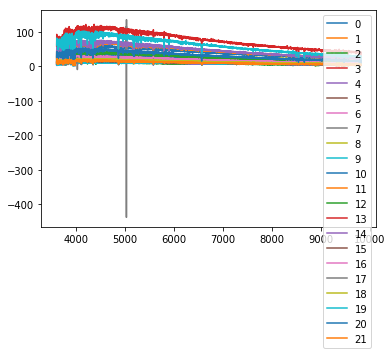

In [54]:
isLRG = np.where((hdu['CMX_TARGET'] & cmx_mask.SV0_LRG != 0) & (hdu['FIBERSTATUS'] == 0))[0]
isBGS = np.where((hdu['CMX_TARGET'] & cmx_mask.SV0_BGS != 0) & (hdu['FIBERSTATUS'] == 0))[0]
isMWS = np.where((hdu['CMX_TARGET'] & cmx_mask.SV0_MWS != 0) & (hdu['FIBERSTATUS'] == 0))[0]

lrgs = bzrflux[isLRG]
bgss = bzrflux[isBGS]
mwss = bzrflux[isMWS]
    
plt.figure()

for i in range(len(mwss)):
        plt.plot(bzrwave,mwss[i,:], label = str(i))
#plt.xlim(3000,6000)
plt.legend()

In [154]:
#ls '/global/cfs/cdirs/desi/spectro/redux/daily/tiles/67230/20200315/'


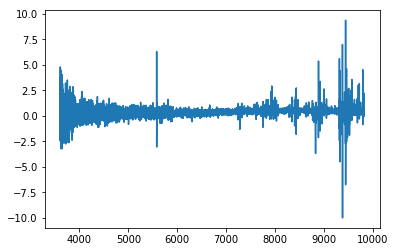

In [70]:
plt.plot(bzrwave,lrgs[1,:], label = str(i))
#plt.xlim(5000,5050)

In [77]:
redshift['TARGETID','Z'][isLRG]
templates, lamRange_temp, logAge_grid, metal_grid = spectral_library(velscale, FWHM_gal)

NameError: name 'spectral_library' is not defined

In [73]:
vel =(3e8)*np.log(1 + redshift['Z'][1])   # eq.(8) of Cappellari (2017)
start = [0, 200.]  # (km/s), starting guess for [V, sigma]
print(start)
noise=np.ones_like(bzrwave)
t = clock()

pp = ppxf(templates_simple, bzrwave,noise, velscale, start,plot=True, \
          moments=2, degree=4, vsyst=dv, clean=False, lam=lrgs[1])

print("Formal errors:")
print("     dV    dsigma   dh3      dh4")
print("".join("%8.2g" % f for f in pp.error*np.sqrt(pp.chi2)))

print('Elapsed time in PPXF: %.2f s' % (clock() - t))

[0, 200.0]


NameError: name 'templates_simple' is not defined